# 1st delete NaN

In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('data/train.csv')
predict = pd.read_csv('data/test.csv')

In [3]:
passenger_id = predict[['id']].copy()

In [4]:
predict.describe().T

,count,mean,std,min,25%,50%,75%,max
id,250000.0,874999.500000,72168.927986,750000.00,812499.75,874999.50,937499.25,999999.00
Episode_Length_minutes,221264.0,419.298741,166854.502468,2.47,35.78,63.97,94.15,78486264.00
Host_Popularity_percentage,250000.0,59.716491,22.880028,2.49,39.25,59.90,79.39,117.76
Guest_Popularity_percentage,201168.0,52.192796,28.445034,0.00,28.32,53.36,76.56,116.82
Number_of_Ads,250000.0,1.355852,4.274399,0.00,0.00,1.00,2.00,2063.00


In [5]:
train.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,750000.0,374999.500000,216506.495284,0.0,187499.75000,374999.50000,562499.25000,749999.00
Episode_Length_minutes,662907.0,64.504738,32.969603,0.0,35.73000,63.84000,94.07000,325.24
Host_Popularity_percentage,750000.0,59.859901,22.873098,1.3,39.41000,60.05000,79.53000,119.46
Guest_Popularity_percentage,603970.0,52.236449,28.451241,0.0,28.38000,53.58000,76.60000,119.91
Number_of_Ads,749999.0,1.348855,1.151130,0.0,0.00000,1.00000,2.00000,103.91
Listening_Time_minutes,750000.0,45.437406,27.138306,0.0,23.17835,43.37946,64.81158,119.97


In [7]:
predict.isnull().sum()

id                                 0
Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         28736
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    48832
Number_of_Ads                      0
Episode_Sentiment                  0
dtype: int64

In [8]:
train.isnull().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [10]:
train.nunique()

id                             750000
Podcast_Name                       48
Episode_Title                     100
Episode_Length_minutes          12268
Genre                              10
Host_Popularity_percentage       8038
Publication_Day                     7
Publication_Time                    4
Guest_Popularity_percentage     10019
Number_of_Ads                      12
Episode_Sentiment                   3
Listening_Time_minutes          42807
dtype: int64

In [11]:
train.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


# Preprocessing of data

In [12]:
def create_features(df):
    df[['Episode_Name','Episode_Num']] = df['Episode_Title'].str.split(' ', expand=True)
    df['Episode_Num'] = df['Episode_Num'].astype(int)

    # ジャンルごとにホストの人気度の平均を計算して，それを辞書型に変換
    #genre_to_weight = df.groupby('Genre')['Host_Popularity_percentage'].mean().to_dict()
    #df['Host_Popularity_by_Genre'] =  df['Host_Popularity_percentage'] * df['Genre'].map(genre_to_weight)
    """
    # 広告数とホスト人気の関係    
    ads_to_weight = df.groupby('Number_of_Ads')['Host_Popularity_percentage'].mean().to_dict()
    df['Host_Popularity_by_Ads'] =  df['Host_Popularity_percentage'] * df['Number_of_Ads'].map(ads_to_weight)
    
    # 視聴時間の長さ / 広告数
    ads_to_weight = df.groupby('Number_of_Ads')['Episode_Length_minutes'].mean().to_dict()
    df['Episode_Ads'] =  df['Episode_Length_minutes'] / df['Number_of_Ads'].map(ads_to_weight)

    
    """
    # ホストの人気 ＊ エピソードの長さ
    #df['Host_Popularity_by_Episode_Length'] = df['Host_Popularity_percentage'] * df['Episode_Length_minutes']

    # ホスト人気 * ゲスト人気
    #df['Host_Guest_Popularity'] = df['Host_Popularity_percentage'] * df['Guest_Popularity_percentage']
    
    return df

#train = create_features(train)
#predict = create_features(predict)

In [13]:
train.nunique()

id                             750000
Podcast_Name                       48
Episode_Title                     100
Episode_Length_minutes          12268
Genre                              10
Host_Popularity_percentage       8038
Publication_Day                     7
Publication_Time                    4
Guest_Popularity_percentage     10019
Number_of_Ads                      12
Episode_Sentiment                   3
Listening_Time_minutes          42807
dtype: int64

In [14]:
# columns to drop 
def delete_columns(df):
    df.drop(columns=['id'], inplace=True)
    return df

train = delete_columns(train)
predict = delete_columns(predict)

## 異常値の処理

In [15]:
def clean_abnormal_values(df):
    
    # 100%以上はクリップ（`.loc` を使って変更）
    df.loc[:, 'Host_Popularity_percentage'] = df['Host_Popularity_percentage'].clip(upper=100)
    df.loc[:, 'Guest_Popularity_percentage'] = df['Guest_Popularity_percentage'].clip(upper=100)

    df.loc[:, 'Episode_Length_minutes'] = df['Episode_Length_minutes'].clip(upper=125)
    df.loc[:, 'Number_of_Ads'] = df['Number_of_Ads'].clip(upper=12)
    
    return df

# train と predict に適用
train = clean_abnormal_values(train)
predict = clean_abnormal_values(predict)

In [16]:
train.isnull().sum()

Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [17]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Episode_Length_minutes,662907.0,64.504436,32.968132,0.0,35.73000,63.84000,94.07000,125.00
Host_Popularity_percentage,750000.0,59.859482,22.872221,1.3,39.41000,60.05000,79.53000,100.00
Guest_Popularity_percentage,603970.0,52.236124,28.450622,0.0,28.38000,53.58000,76.60000,100.00
Number_of_Ads,749999.0,1.348012,1.111574,0.0,0.00000,1.00000,2.00000,12.00
Listening_Time_minutes,750000.0,45.437406,27.138306,0.0,23.17835,43.37946,64.81158,119.97


In [18]:
#"""
from sklearn.preprocessing import RobustScaler

def normalize_data(df):
    scaler = RobustScaler()
    # スケーリングを行うカラムを指定
    #columns_to_scale = ['Episode_Length_minutes', 'Number_of_Ads']
    columns_to_scale = ['Episode_Length_minutes']
    
    # スケーリングを実行
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    
    return df

train = normalize_data(train)
predict = normalize_data(predict)
#"""


In [19]:
train.head()

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,Joke Junction,Episode 26,0.959205,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,Study Sessions,Episode 16,0.172437,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,Digital Digest,Episode 45,0.057079,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,Mind & Body,Episode 86,0.799966,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


# Data preparation before modeling

### Since there are few tpyes of object data,label encoding will be applied


In [20]:
""""
def target_encoding(train_df, predict_df, columns, target_col):
    for col in columns:
        # 各カテゴリに対するターゲットの平均を計算
        target_mean = train_df.groupby(col)[target_col].mean()

        # 学習データに適用
        train_df[col + '_te'] = train_df[col].map(target_mean)

        # 予測データに適用（未知カテゴリは平均値で埋める）
        global_mean = train_df[target_col].mean()
        predict_df[col + '_te'] = predict_df[col].map(target_mean).fillna(global_mean)

        # 元のカテゴリ列を削除
        train_df.drop(columns=[col], inplace=True)
        predict_df.drop(columns=[col], inplace=True)

    return train_df, predict_df


encoding_cols = ['Podcast_Name', 'Genre', 'Publication_Day',
                 'Publication_Time', 'Episode_Sentiment', 'Episode_Title']

# 例：目的変数が 'Target' というカラム名であると仮定
train, predict = target_encoding(train, predict, encoding_cols, target_col='Listening_Time_minutes')
"""


'"\ndef target_encoding(train_df, predict_df, columns, target_col):\n    for col in columns:\n        # 各カテゴリに対するターゲットの平均を計算\n        target_mean = train_df.groupby(col)[target_col].mean()\n\n        # 学習データに適用\n        train_df[col + \'_te\'] = train_df[col].map(target_mean)\n\n        # 予測データに適用（未知カテゴリは平均値で埋める）\n        global_mean = train_df[target_col].mean()\n        predict_df[col + \'_te\'] = predict_df[col].map(target_mean).fillna(global_mean)\n\n        # 元のカテゴリ列を削除\n        train_df.drop(columns=[col], inplace=True)\n        predict_df.drop(columns=[col], inplace=True)\n\n    return train_df, predict_df\n\n\nencoding_cols = [\'Podcast_Name\', \'Genre\', \'Publication_Day\',\n                 \'Publication_Time\', \'Episode_Sentiment\', \'Episode_Title\']\n\n# 例：目的変数が \'Target\' というカラム名であると仮定\ntrain, predict = target_encoding(train, predict, encoding_cols, target_col=\'Listening_Time_minutes\')\n'

In [21]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoding(train_df, predict_df, columns):
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # ←ここを修正

    # 学習データにフィットして変換
    ohe.fit(train_df[columns])
    train_encoded = ohe.transform(train_df[columns])
    predict_encoded = ohe.transform(predict_df[columns])

    # 新しい列名を取得（カテゴリ名付き）
    ohe_columns = ohe.get_feature_names_out(columns)

    # DataFrameに変換
    train_encoded_df = pd.DataFrame(train_encoded, columns=ohe_columns, index=train_df.index)
    predict_encoded_df = pd.DataFrame(predict_encoded, columns=ohe_columns, index=predict_df.index)

    # 元の列を削除してエンコードした列を結合
    train_df = train_df.drop(columns=columns).join(train_encoded_df)
    predict_df = predict_df.drop(columns=columns).join(predict_encoded_df)

    return train_df, predict_df


# One-Hot Encoding の対象列
encoding_cols = ['Publication_Day',
                 'Publication_Time', 'Episode_Sentiment','Genre',]

train, predict = one_hot_encoding(train, predict, encoding_cols)


In [22]:
#"""
from sklearn.model_selection import KFold
import numpy as np

def kfold_target_encoding(train_df, predict_df, columns, target_col, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    for col in columns:
        train_df[col + '_te'] = np.nan
        for train_index, val_index in kf.split(train_df):
            tr, val = train_df.iloc[train_index], train_df.iloc[val_index]
            means = tr.groupby(col)[target_col].mean()
            train_df.loc[val.index, col + '_te'] = val[col].map(means)

        # テスト（予測）データには全体平均からマップ
        global_means = train_df.groupby(col)[target_col].mean()
        global_mean = train_df[target_col].mean()
        predict_df[col + '_te'] = predict_df[col].map(global_means).fillna(global_mean)

        # 元の列を削除するならここで
        train_df.drop(columns=[col], inplace=True)
        predict_df.drop(columns=[col], inplace=True)

    return train_df, predict_df

encoding_cols = ['Podcast_Name',
                 'Episode_Title']

# 例：目的変数が 'Target' というカラム名であると仮定
train, predict = kfold_target_encoding(train, predict, encoding_cols, target_col='Listening_Time_minutes')
#"""


In [23]:
"""
# Label Encoding
from sklearn.preprocessing import LabelEncoder

def label_enocding(df,columns):
    le = LabelEncoder()

    for col in columns:
        df[col] = le.fit_transform(df[col])
    return df

encoding_cols = ['Podcast_Name','Genre','Publication_Day',
                 'Publication_Time','Episode_Sentiment','Episode_Title']

train = label_enocding(train, encoding_cols)
predict = label_enocding(predict, encoding_cols)
"""


"\n# Label Encoding\nfrom sklearn.preprocessing import LabelEncoder\n\ndef label_enocding(df,columns):\n    le = LabelEncoder()\n\n    for col in columns:\n        df[col] = le.fit_transform(df[col])\n    return df\n\nencoding_cols = ['Podcast_Name','Genre','Publication_Day',\n                 'Publication_Time','Episode_Sentiment','Episode_Title']\n\ntrain = label_enocding(train, encoding_cols)\npredict = label_enocding(predict, encoding_cols)\n"

In [24]:
train.head()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes,Publication_Day_Friday,Publication_Day_Monday,Publication_Day_Saturday,Publication_Day_Sunday,Publication_Day_Thursday,...,Genre_Education,Genre_Health,Genre_Lifestyle,Genre_Music,Genre_News,Genre_Sports,Genre_Technology,Genre_True Crime,Podcast_Name_te,Episode_Title_te
0,NaN,74.81,NaN,0.0,31.41998,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,45.916516,41.373238
1,0.959205,66.95,75.95,2.0,88.01241,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.558974,46.204057
2,0.172437,69.97,8.97,0.0,44.92531,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.942467,44.415697
3,0.057079,57.22,78.70,2.0,46.27824,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,44.771390,50.443926
4,0.799966,80.07,58.68,3.0,75.61031,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,46.925494,45.097401


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Episode_Length_minutes       662907 non-null  float64
 1   Host_Popularity_percentage   750000 non-null  float64
 2   Guest_Popularity_percentage  603970 non-null  float64
 3   Number_of_Ads                749999 non-null  float64
 4   Listening_Time_minutes       750000 non-null  float64
 5   Publication_Day_Friday       750000 non-null  float64
 6   Publication_Day_Monday       750000 non-null  float64
 7   Publication_Day_Saturday     750000 non-null  float64
 8   Publication_Day_Sunday       750000 non-null  float64
 9   Publication_Day_Thursday     750000 non-null  float64
 10  Publication_Day_Tuesday      750000 non-null  float64
 11  Publication_Day_Wednesday    750000 non-null  float64
 12  Publication_Time_Afternoon   750000 non-null  float64
 13 

In [26]:
from sklearn.model_selection import train_test_split

def split_data(df, test_size=0.2, random_state=42):
    X = df.drop(columns=['Listening_Time_minutes'])
    y = df['Listening_Time_minutes']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(train)
predict_X = predict.copy()

# Model Construction

In [27]:
import xgboost as xgb

# XGBoostモデルの構築
def build_xgboost_model(n_estimators=100,max_depth=5,learning_rate=0.1):
    """XGBoostモデルを構築する関数"""
    model = xgb.XGBRegressor(
        # 回帰タスクに適した損失関数（MSE）
        objextive='reg:squarederror',
        # 決定木の数
        n_estimators=n_estimators,
        # 決定機の深さ
        max_depth=max_depth,
        # 学習率(小さいほど安定，収束が遅くなる)
        learning_rate=learning_rate,
        # 乱数シード
        random_state=42
    )
    return model

# XGBoostモデルの構築
xgb_X_train = X_train
xgb_X_test = X_test

# モデルの構築
xgb_model = build_xgboost_model()

/Users/yasuo/myenv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:03:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "objextive" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


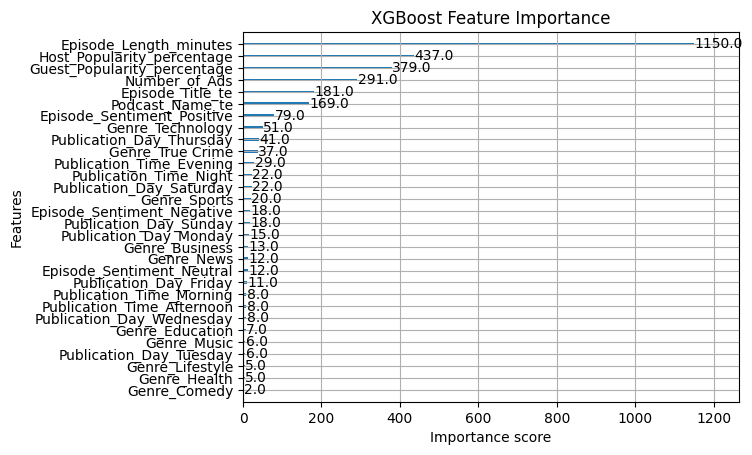

In [28]:
import matplotlib.pyplot as plt

# Train XGBoost model
xgb_model.fit(X_train, y_train) # XGBoostモデルの学習

# Feature importance
xgb.plot_importance(xgb_model) # 特徴量の重要度をプロット
plt.title('XGBoost Feature Importance') # タイトル
plt.show() # グラフの表示

# Model evalution

In [29]:
xgb_pred = xgb_model.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def evaluate_metrics(y_true,y_pred):
    
    results = []

    def calulate_metrics(y_true, y_pred):
        mse = mean_squared_error(y_true, y_pred)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)

        return {
            'MSE': mse,
            'RMSE': mae,
            'R2': r2
        }
    results.append(calulate_metrics(y_true, y_pred))

    return pd.DataFrame(results)

results = evaluate_metrics(y_test, xgb_pred)
display(results)

,MSE,RMSE,R2
0,170.544364,9.510769,0.768228


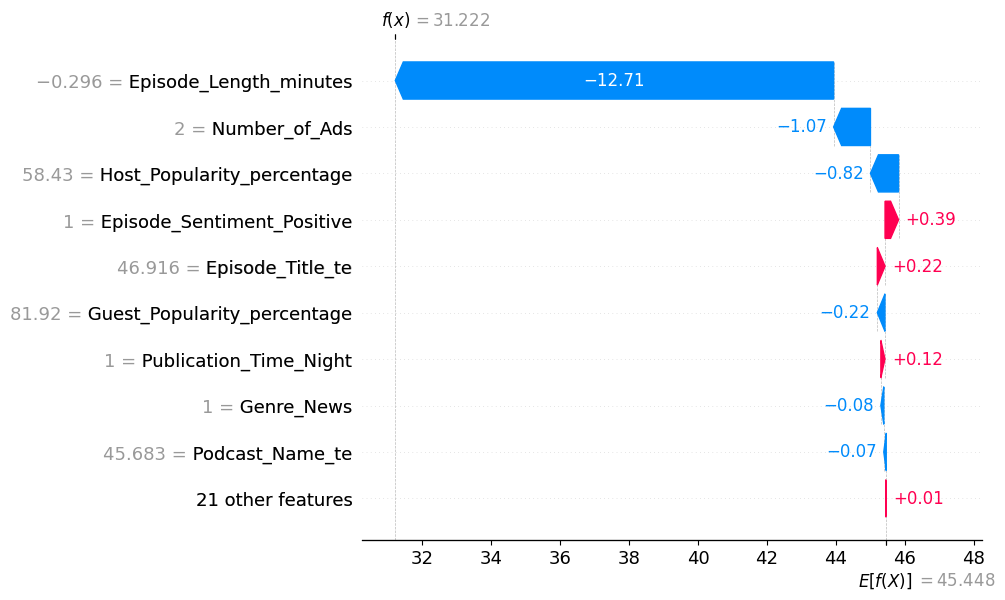

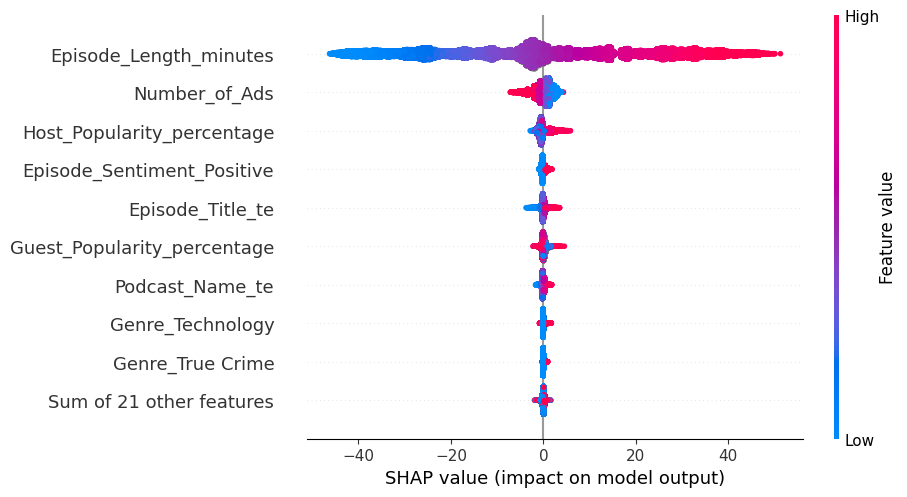

In [31]:
import shap

def explain_model(model):
    # SHAP explainerを作成（TreeExplainerはXGBoostなどに最適）
    explainer = shap.Explainer(model)

    # SHAP値を計算（X_testに対して）
    shap_values = explainer(X_test)

    # 可視化（例：1件目の予測理由）
    shap.plots.waterfall(shap_values[0])

    # 全体の特徴量の影響（要約プロット）
    shap.plots.beeswarm(shap_values)

explain_model(xgb_model)


# Optuna

In [32]:
import optuna
def optimize_xgboost(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500), # 決定木の数
        'max_depth': trial.suggest_int('max_depth', 3, 10), # 決定木の深さ
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3), # 学習率
        'subsample': trial.suggest_float('subsample', 0.6, 1.0), # サブサンプル
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0), # 列のサブサンプル
        'gamma': trial.suggest_float('gamma', 0, 1), # 葉ノードを分割するために必要な最小損失削減
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10), # 葉ノードの重みの最小合計
        'objective': 'reg:squarederror', # 回帰タスクに適した損失関数
        'random_state': 42                
    }

    model = xgb.XGBRegressor(**params)
    model = model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    return mse

study = optuna.create_study(direction='minimize')
study.optimize(optimize_xgboost, n_trials=100)

# dislay best results
print('Best trial:')
trial = study.best_trial # 最良のトライアル
print(f"  MSE: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# Predict
optimized_xgb = xgb.XGBRegressor(**trial.params, random_state=42)
optimized_xgb.fit(X_train, y_train)

[I 2025-04-22 18:03:15,045] A new study created in memory with name: no-name-d042e4a5-c86f-4e32-9470-8ba71e3f8d43
[I 2025-04-22 18:03:19,111] Trial 0 finished with value: 170.24809369084676 and parameters: {'n_estimators': 403, 'max_depth': 4, 'learning_rate': 0.08741087681347406, 'subsample': 0.9808338974063845, 'colsample_bytree': 0.6389203635329658, 'gamma': 0.7573916284906298, 'min_child_weight': 8}. Best is trial 0 with value: 170.24809369084676.
[I 2025-04-22 18:03:24,556] Trial 1 finished with value: 170.71048896687586 and parameters: {'n_estimators': 268, 'max_depth': 8, 'learning_rate': 0.20893272170436153, 'subsample': 0.6785170832104825, 'colsample_bytree': 0.6392118449267826, 'gamma': 0.37590906224473697, 'min_child_weight': 4}. Best is trial 0 with value: 170.24809369084676.
[I 2025-04-22 18:03:28,407] Trial 2 finished with value: 170.07245131178524 and parameters: {'n_estimators': 175, 'max_depth': 9, 'learning_rate': 0.21025690190429255, 'subsample': 0.9573714779008907, 

Best trial:
  MSE: 165.8469572134897
  Params: 
    n_estimators: 485
    max_depth: 10
    learning_rate: 0.05800057704409316
    subsample: 0.8339380629969139
    colsample_bytree: 0.7046606735498381
    gamma: 0.1442800181683149
    min_child_weight: 9


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7046606735498381, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=0.1442800181683149, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05800057704409316,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=9, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=485, n_jobs=None,
             num_parallel_tree=None, ...)

In [33]:
optimized_pred = optimized_xgb.predict(xgb_X_test)
optimized_metrics = evaluate_metrics(y_test,  optimized_pred) # 評価
display(optimized_metrics)

,MSE,RMSE,R2
0,165.846957,9.332445,0.774612


In [34]:
# 保存（バイナリ形式） 12.84476
#optimized_xgb.save_model("model/xgboost/xgb_model_2.json")  # .json でも .model でもOK

"""12.85819
import xgboost as xgb 

# モデルの読み込み
loaded_model = xgb.XGBRegressor()
loaded_model.load_model("model/xgboost/xgb_model.json")
#"""

'12.85819\nimport xgboost as xgb \n\n# モデルの読み込み\nloaded_model = xgb.XGBRegressor()\nloaded_model.load_model("model/xgboost/xgb_model.json")\n#'

In [35]:
predixt_y = optimized_xgb.predict(predict_X)

predict_df = pd.DataFrame(predixt_y , columns=['Listening_Time_minutes'])

submission = pd.concat([passenger_id, predict_df], axis=1)

display(submission.head())

,id,Listening_Time_minutes
0,750000,53.820618
1,750001,18.734728
2,750002,49.951710
3,750003,79.464272
4,750004,43.630978


In [36]:
submission.shape

(250000, 2)

In [37]:
submission.isnull().sum()

id                        0
Listening_Time_minutes    0
dtype: int64

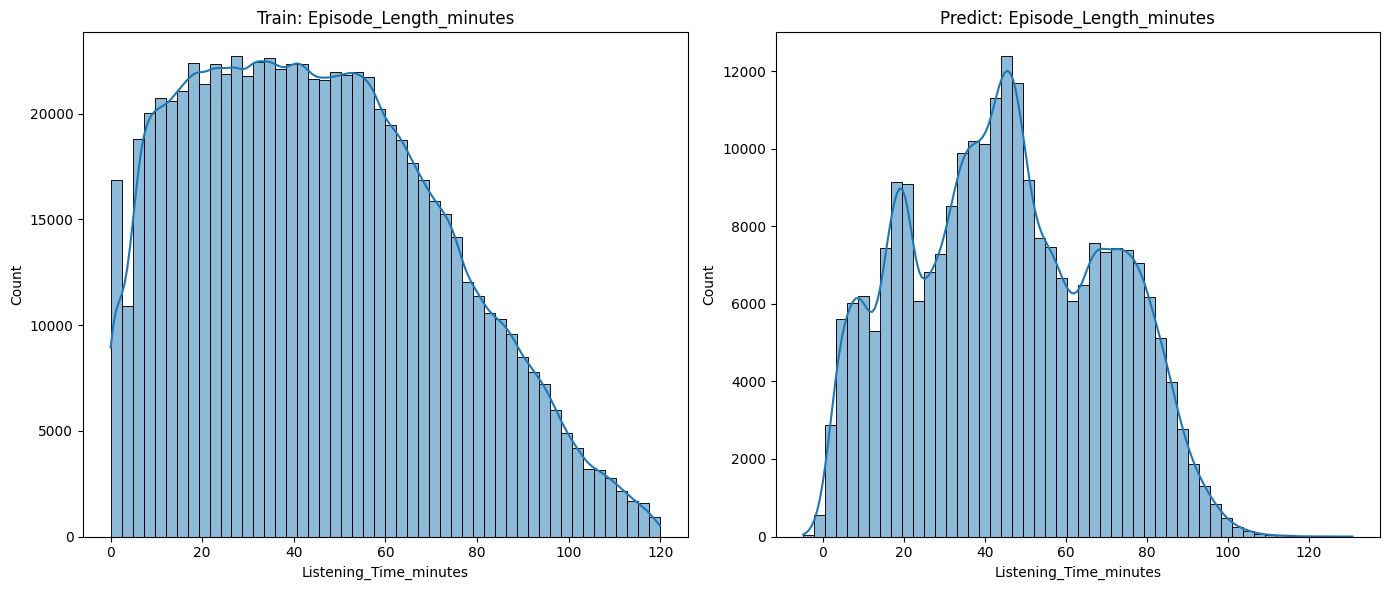

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# サブプロットの準備（横に2つ）
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# train データのヒストグラム + KDE
sns.histplot(train['Listening_Time_minutes'].dropna(), kde=True, bins=50, ax=axs[0])
axs[0].set_title('Train: Episode_Length_minutes')
#axs[0].set_xlabel('Episode_Length_minutes')

# predict データのヒストグラム + KDE
sns.histplot(submission['Listening_Time_minutes'].dropna(), kde=True, bins=50, ax=axs[1])
axs[1].set_title('Predict: Episode_Length_minutes')
#axs[1].set_xlabel('Episode_Length_minutes')

# レイアウト調整して表示
plt.tight_layout()
plt.show()

In [39]:
submission.to_csv('submit/xgb_submit/xgb_submit16.csv', index=False)